In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/data.csv")

In [ ]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [ ]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df=df.rename(columns={'diagnosis':'label'})
print(df.dtypes)

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<Axes: xlabel='label', ylabel='count'>

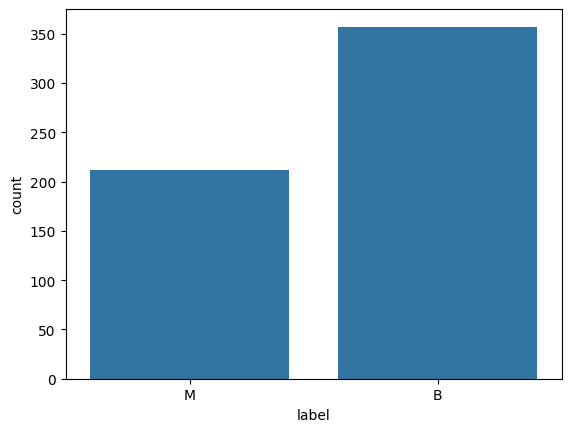

In [ ]:
sns.countplot(x="label", data=df)

In [ ]:
#### replace categorical values with numbers #####
print('disstribution of data', df['label'].value_counts())

#### define the dependent variable that needs to be predicted######
y=df['label'].values
print('labes before encoding are:', np.unique(y))

### encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
print('labels after encoding are:',np.unique(y))

disstribution of data label
B    357
M    212
Name: count, dtype: int64
labes before encoding are: ['B' 'M']
labels after encoding are: [0 1]


In [ ]:
### define x and normalize/ scale values
### define the independent variables. drop label and id, and normalize other data
x=df.drop(labels=["label","id"], axis=1)
print(x.describe().T)

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [ ]:
#scale/ normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)
print(x)  ###scaled values

[[0.52103744 0.0226581  0.54598853 ... 0.59846245 0.41886396        nan]
 [0.64314449 0.27257355 0.61578329 ... 0.23358959 0.22287813        nan]
 [0.60149557 0.3902604  0.59574321 ... 0.40370589 0.21343303        nan]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.12872068 0.1519087         nan]
 [0.64456434 0.66351031 0.66553797 ... 0.49714173 0.45231536        nan]
 [0.03686876 0.50152181 0.02853984 ... 0.25744136 0.10068215        nan]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
#split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=42)
print("shape of training data is:", x_train.shape)
print("shape of testing data is:", x_test.shape)

shape of training data is: (426, 31)
shape of testing data is: (143, 31)


In [ ]:
x_train = x_train[:, :30]
x_test = x_test[:, :30]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
model=Sequential()
model.add(Dense(16, activation='relu', input_dim=30))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
##fit with no early stopping or other callbacks
history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/100
14/14 [==============================] - 6s 28ms/step - loss: 0.7114 - accuracy: 0.3991 - val_loss: 0.6977 - val_accuracy: 0.4196
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6801 - accuracy: 0.4695 - val_loss: 0.6663 - val_accuracy: 0.5105
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6587 - accuracy: 0.6362 - val_loss: 0.6375 - val_accuracy: 0.7343
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6233 - accuracy: 0.7700 - val_loss: 0.6088 - val_accuracy: 0.8531
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6006 - accuracy: 0.8075 - val_loss: 0.5817 - val_accuracy: 0.8741
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 0.5810 - accuracy: 0.8192 - val_loss: 0.5564 - val_accuracy: 0.8811
Epoch 7/100
14/14 [==============================] - 0s 8ms/step - loss: 0.5565 - accuracy: 0.8169 - val_loss: 0.5301 - val_accuracy: 0.9021
Epoch 8/100

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

Validation Loss: 0.0877050906419754
Validation Accuracy: 0.9790209531784058


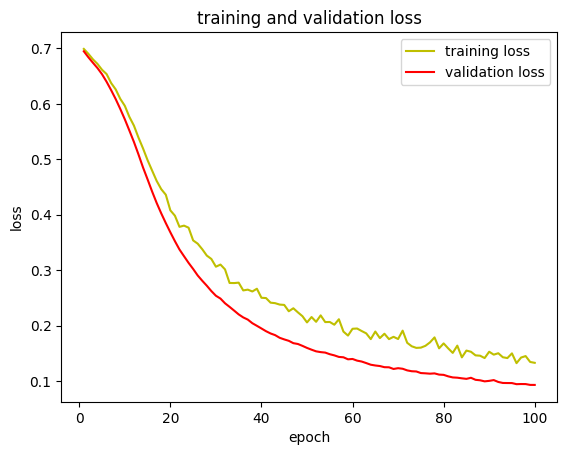

<function matplotlib.pyplot.show(close=None, block=None)>

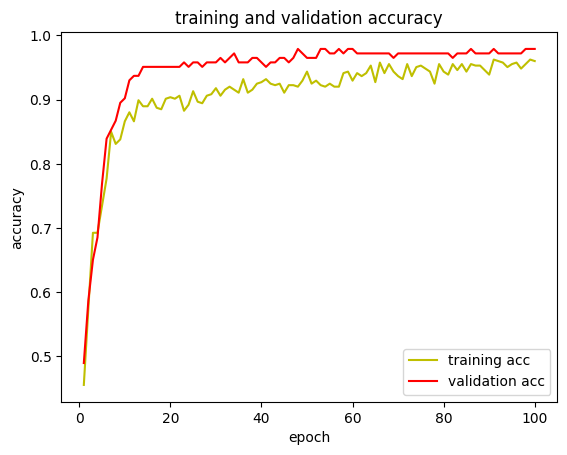

In [ ]:
#plot the training and validation accura y and loss at each epoch
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs =range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,'y',label='training acc')
plt.plot(epochs,val_acc,'r',label='validation acc')
plt.title('training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show

5/5 [==============================] - 0s 2ms/step
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0]


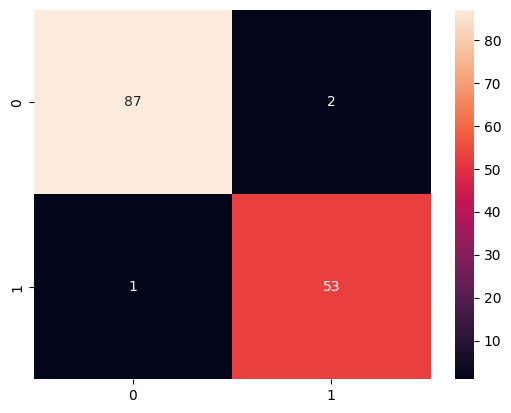

In [ ]:
#predicting the test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(y_test)

#making the confusion  matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()